In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Creating df from csv file

df = pd.read_csv('SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
# Understanding data types and looking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
# Converting Time features to datetime Dtype

df['Data'] = pd.to_datetime(df['Data'])
df['Time'] = pd.to_datetime(df['Time'])

df['Month'] = df['Data'].dt.month.astype(int)
df['Hour'] = df['Time'].dt.hour.astype(int)

In [6]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Hour
0,1475229326,2016-09-29,2025-01-23 23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,23
1,1475229023,2016-09-29,2025-01-23 23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,23
2,1475228726,2016-09-29,2025-01-23 23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,23
3,1475228421,2016-09-29,2025-01-23 23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,23
4,1475228124,2016-09-29,2025-01-23 23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,23


In [7]:
# Droping out unusefull columns

df = df.drop(columns=['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'])
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Hour
0,1.21,48,30.46,59,177.39,5.62,9,23
1,1.21,48,30.46,58,176.78,3.37,9,23
2,1.23,48,30.46,57,158.75,3.37,9,23
3,1.21,48,30.46,60,137.71,3.37,9,23
4,1.17,48,30.46,62,104.95,5.62,9,23


In [8]:
# Analyzing data distribution. 
# Since this a regression case, this data will be usefull to analyze the model performance.

df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Hour
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,11.557425
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,6.912034
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,6.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,12.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,18.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,23.000000


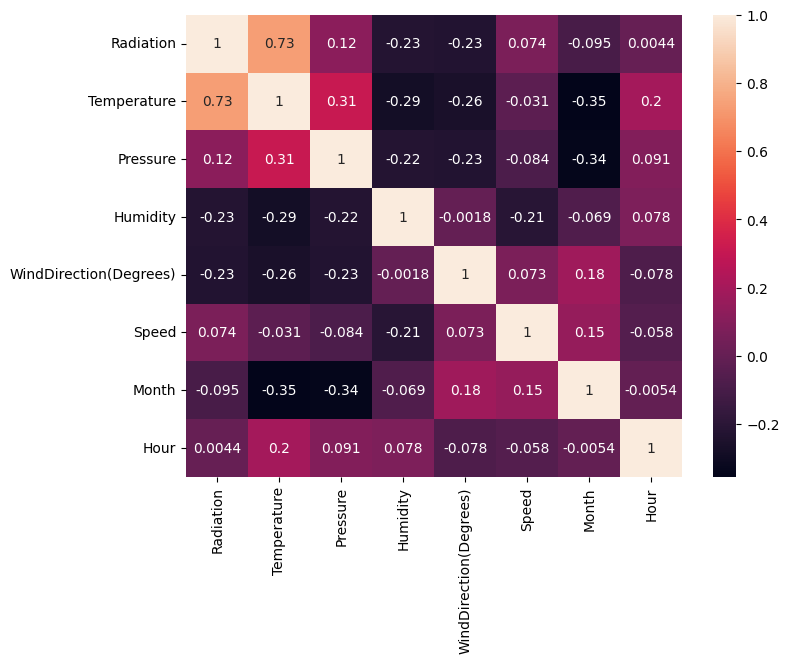

In [9]:
# Creating a correlation matrix and a heatmap vizualization.

corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True)
plt.show()

# Temperature and radiation are highly correlated, as expected.

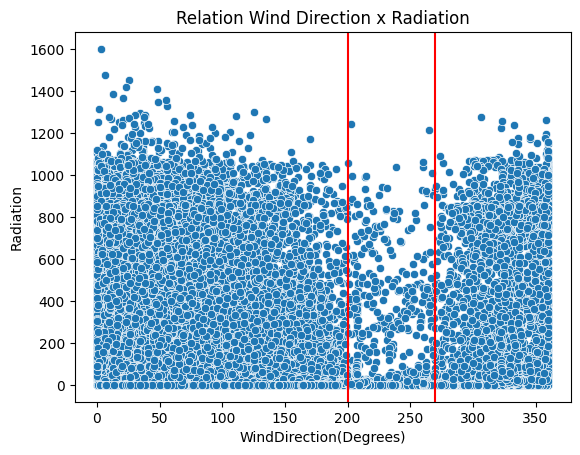

In [10]:
# There seems to be a gap, mostly between 200 and 270 degrees where we have a lack of data.

sns.scatterplot(df, x= 'WindDirection(Degrees)', y='Radiation')
plt.axvline(x=200, color='red', linestyle='-')
plt.axvline(x=270, color='red', linestyle='-')
plt.title('Relation Wind Direction x Radiation')
plt.show()

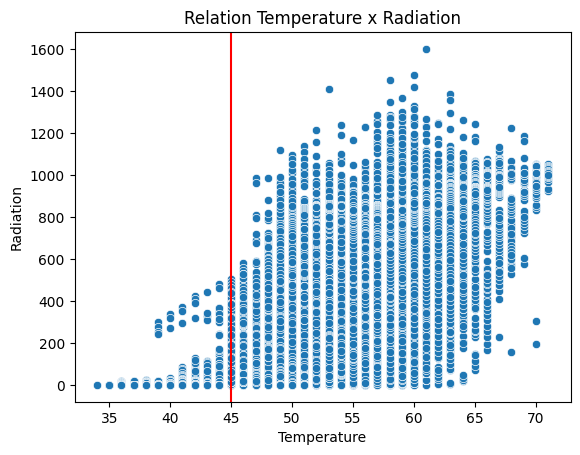

In [11]:
# Vizualizing data distribution for the 0.73 correlation between Temperature and Radiation
# There is a significant rise in Radiation values and records distribution once it reaches the 45 temperature.

sns.scatterplot(df, x= 'Temperature', y='Radiation')
plt.title('Relation Temperature x Radiation')
plt.axvline(x=45, color='red')
plt.show()

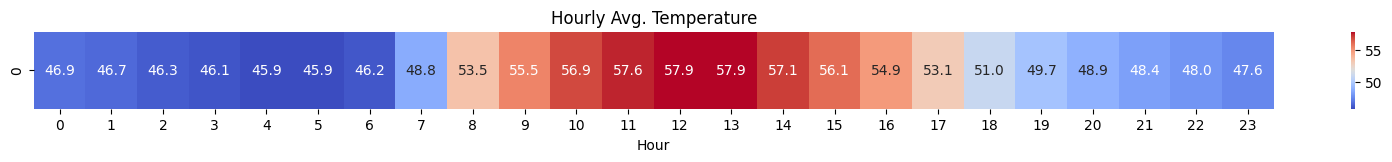

In [12]:
# Since temperature and radiation are correlated, the heatmpa allows to confirm high and low temperature hours.

avg_temperature_hourly = df.groupby('Hour')['Temperature'].mean()
heatmap_data = avg_temperature_hourly.values.reshape(1, -1)

plt.figure(figsize=(20,1))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True,fmt='.1f')
plt.title('Hourly Avg. Temperature')
plt.xlabel('Hour')
plt.show()

In [13]:
# Library import for statistical test where the results will indicate if there is a relevant difference
# between monthly radiation means. By identifying this, it can be determined if 'Month' feature will help
# the ML model to better understand pattern on data.


from scipy import stats

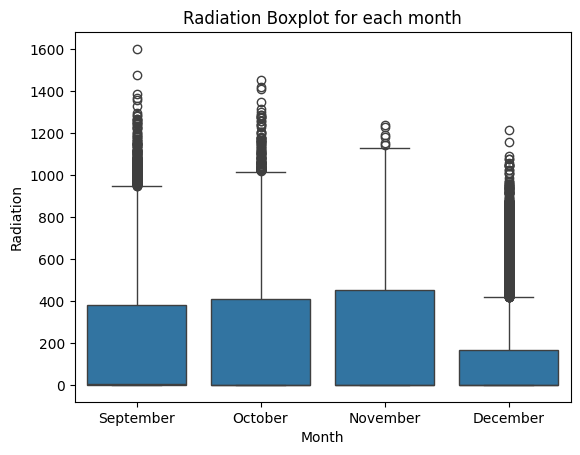

In [14]:
boxplot_data = df.groupby(['Month', 'Radiation']).size()
sns.boxplot(df, x='Month', y='Radiation')
plt.title('Radiation Boxplot for each month')
plt.xticks(ticks=[0,1,2,3], labels=['September', 'October', 'November', 'December'])
plt.show()

In [15]:
# Results indicates that, statistically, there is a considerable difference between means of radiation for each month.

stat, p_value = stats.kruskal(
    df[df['Month'] == 9]['Radiation'],
    df[df['Month'] == 10]['Radiation'],
    df[df['Month'] == 11]['Radiation'],
    df[df['Month'] == 12]['Radiation']
)
print(f'Kruskal test:\nStatistic: {stat}\nP-value: {p_value}')
print('\nConclusion')
if p_value < 0.05:
    print('There is a considerable difference between monthly radiation means.')
else:
    print('There is no considerable difference between monthly radiation means.')


Kruskal test:
Statistic: 715.8714919198229
P-value: 7.593528870452562e-155

Conclusion
There is a considerable difference between monthly radiation means.


In [108]:
# Importing ML library and performanece metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [290]:
# Separating target from features and dividing train and test data 

X = df.drop(['Radiation'], axis=1)
y = df[['Radiation']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 42)

In [291]:
def model_analysis(model):
    """Function for model performance analysis"""

    
    importance = sorted(zip(X.columns, (model.feature_importances_ * 100)), key=lambda x: x[1], reverse=True)
    print('-'*31,'\nFeature Importance\n')
    for k, v in importance:
        print(f'{k:<23} {v:>5.2f} %')  
    print('-'*31)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)


    y_pred_train_data = pd.DataFrame(y_pred_train, columns=['Pred_Radiation'])
    y_train_data = y_train.reset_index(drop=True)
    df_results_train = pd.concat([y_train_data, y_pred_train_data], axis=1)
    df_results_train['Residual'] = df_results_train['Radiation'] - df_results_train['Pred_Radiation']

    y_pred_test_data = pd.DataFrame(y_pred_test, columns=['Pred_Radiation'])
    y_test_data = y_test.reset_index(drop=True)
    df_results_test = pd.concat([y_test_data, y_pred_test_data], axis=1)
    df_results_test['Residual'] = df_results_test['Radiation'] - df_results_test['Pred_Radiation']

    print('Train Results')
    print(f'MAE: {mae_train:.3f}')
    print(f'MSE: {mse_train:.3f}')
    print(f'R2: {r2_train:.3f}')
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    ax1.scatter(df_results_train['Radiation'], df_results_train['Pred_Radiation'])
    ax1.set_title('Real Radiation x Predicted Radiation')
    ax1.set_xlabel('Real Radiation')
    ax1.set_ylabel('Predicted Radiation')
    ax2.scatter(df_results_train['Pred_Radiation'], df_results_train['Residual'], alpha=0.5)
    ax2.set_title('Residual Analysis')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residual values')
    ax2.axhline(y=0, color='red', linestyle='--')
    ax3.hist(df_results_train['Residual'], bins=50)
    ax3.set_title('Residual Distribution')
    ax3.set_xlabel('Residual Values')
    ax3.set_ylabel('Count')

    print()
    
    print('Test Results')
    print(f'MAE: {mae_test:.3f}')
    print(f'MSE: {mse_test:.3f}')
    print(f'R2: {r2_test:.3f}')
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    ax1.scatter(df_results_test['Radiation'], df_results_test['Pred_Radiation'])
    ax1.set_title('Real Radiation x Predicted Radiation')
    ax1.set_xlabel('Real Radiation')
    ax1.set_ylabel('Predicted Radiation')
    ax2.scatter(df_results_test['Pred_Radiation'], df_results_test['Residual'], alpha=0.5)
    ax2.set_title('Residual Analysis')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residual values')
    ax2.axhline(y=0, color='red', linestyle='--')
    ax3.hist(df_results_test['Residual'], bins=50)
    ax3.set_title('Residual Distribution')
    ax3.set_xlabel('Residual Values')
    ax3.set_ylabel('Count')

In [359]:
def model_comparison(model_1, model_2):
    """Function for comparison between both models"""

    y_pred_train_1 = model_1.predict(X_train)
    y_pred_test_1 = model_1.predict(X_test)

    mae_train_1 = mean_absolute_error(y_train, y_pred_train_1)
    mse_train_1 = mean_squared_error(y_train, y_pred_train_1)
    r2_train_1 = r2_score(y_train, y_pred_train_1)

    mae_test_1 = mean_absolute_error(y_test, y_pred_test_1)
    mse_test_1 = mean_squared_error(y_test, y_pred_test_1)
    r2_test_1 = r2_score(y_test, y_pred_test_1)

    y_pred_train_2 = model_2.predict(X_train)
    y_pred_test_2 = model_2.predict(X_test)

    mae_train_2 = mean_absolute_error(y_train, y_pred_train_2)
    mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
    r2_train_2 = r2_score(y_train, y_pred_train_2)

    mae_test_2 = mean_absolute_error(y_test, y_pred_test_2)
    mse_test_2 = mean_squared_error(y_test, y_pred_test_2)
    r2_test_2 = r2_score(y_test, y_pred_test_2)

    mae_train_values = [mae_train_1, mae_train_2]
    mae_test_values = [mae_test_1, mae_test_2]
    mse_train_values = [mse_train_1, mse_train_2]
    mse_test_values = [mse_test_1, mse_test_2]
    r2_train_values = [r2_train_1, r2_train_2]
    r2_test_values = [r2_test_1, r2_test_2]

    models = ['Random Forest', 'Gradient Boost']

    bar_width = 0.2
    index = np.arange(len(models))
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

    axes[0].bar(index - bar_width, mae_train_values, bar_width, label='Treino', color='b')
    axes[0].bar(index, mae_test_values, bar_width, label='Teste', color='c')
    axes[0].set_title('MAE Comparison (Lower is better)')
    axes[0].set_ylabel('MAE')
    axes[0].set_xticks(index)
    axes[0].set_xticklabels(models)
    axes[0].legend()

    axes[1].bar(index - bar_width, mse_train_values, bar_width, label='Treino', color='b')
    axes[1].bar(index, mse_test_values, bar_width, label='Teste', color='c')
    axes[1].set_title('MSE Comparison')
    axes[1].set_ylabel('MSE (Lower is better)')
    axes[1].set_xticks(index)
    axes[1].set_xticklabels(models)
    axes[1].legend()

    axes[2].bar(index - bar_width, r2_train_values, bar_width, label='Treino', color='b')
    axes[2].bar(index, r2_test_values, bar_width, label='Teste', color='c')
    axes[2].set_title('R² Comparison (Higher is better)')
    axes[2].set_ylabel('R²')
    axes[2].set_xticks(index)
    axes[2].set_xticklabels(models)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [345]:
# Gradient Boosting model hiperparameters setting and training

gb_model = GradientBoostingRegressor(learning_rate=.06,
                                     n_estimators= 200,
                                     max_depth= 6,
                                     random_state= 42)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.06, max_depth=6, n_estimators=200,
                          random_state=42)

------------------------------- 
Feature Importance

Temperature             60.74 %
Hour                    30.18 %
Humidity                 4.35 %
WindDirection(Degrees)   1.61 %
Pressure                 1.42 %
Month                    1.25 %
Speed                    0.46 %
-------------------------------
Train Results
MAE: 39.354
MSE: 6594.746
R2: 0.934

Test Results
MAE: 46.582
MSE: 9738.095
R2: 0.902


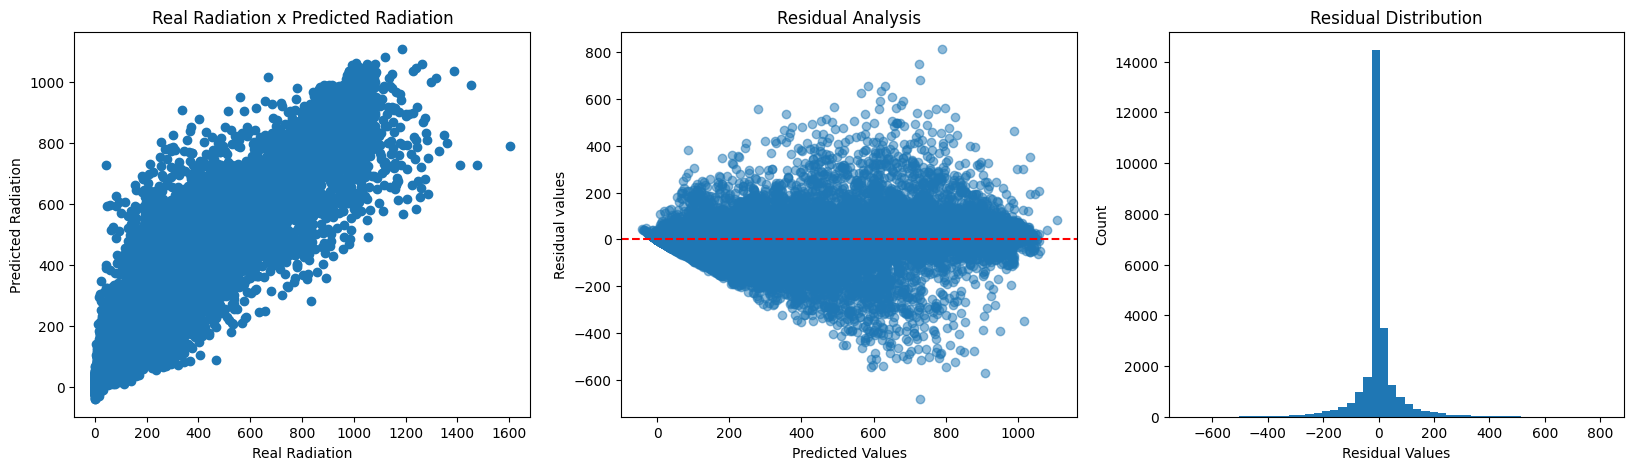

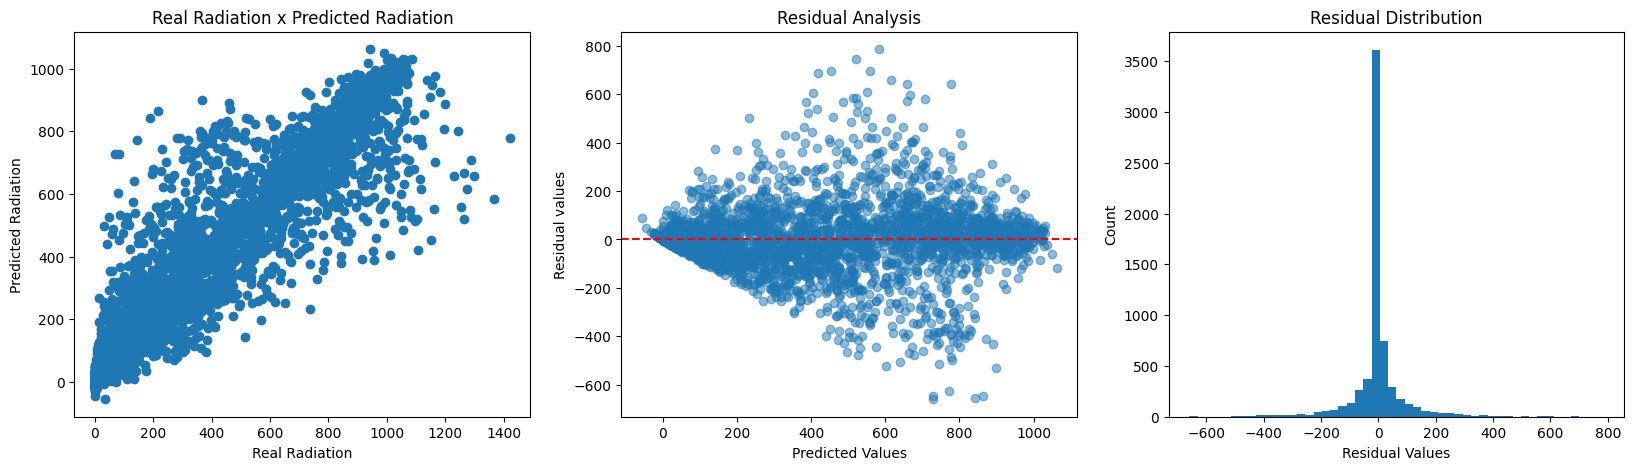

In [341]:
model_analysis(gb_model)

In [ ]:
# Random Forest model hiperparameters setting and training

rf_model = RandomForestRegressor(n_estimators=200,
                                 criterion='squared_error',
                                 min_samples_leaf=4, #1
                                 min_samples_split=6, #2
                                 random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=6, n_estimators=200,
                      random_state=42)

------------------------------- 
Feature Importance

Temperature             58.82 %
Hour                    29.60 %
Humidity                 4.92 %
WindDirection(Degrees)   2.33 %
Pressure                 2.05 %
Month                    1.37 %
Speed                    0.91 %
-------------------------------
Train Results
MAE: 26.484
MSE: 3878.982
R2: 0.961

Test Results
MAE: 39.574
MSE: 8482.565
R2: 0.915


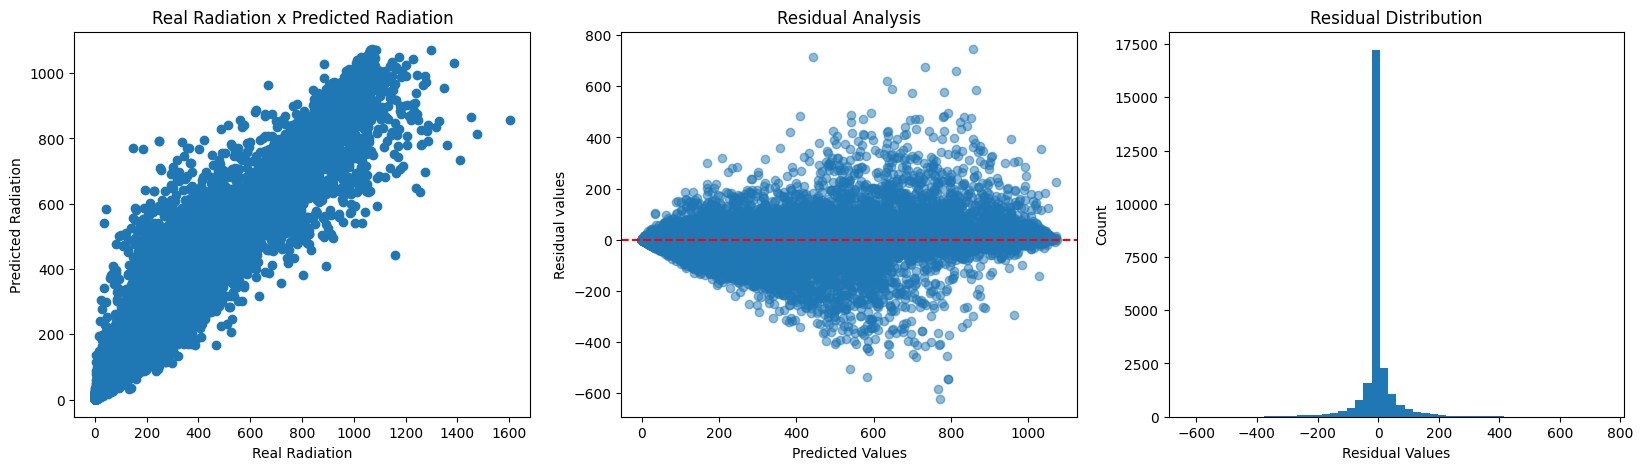

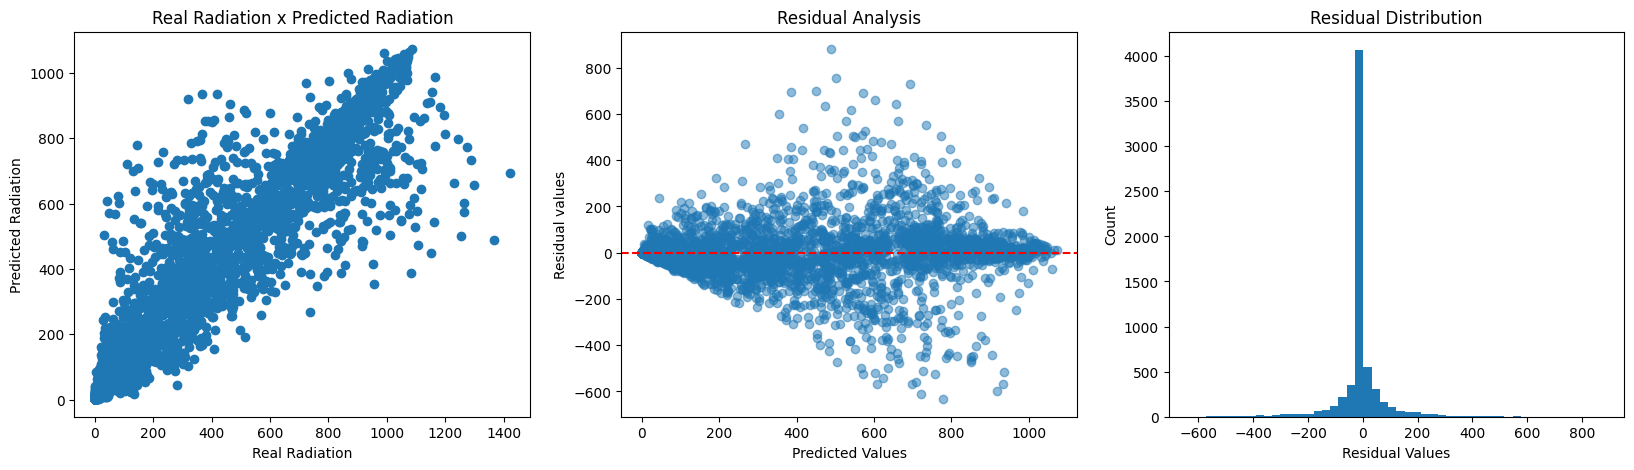

In [343]:
model_analysis(rf_model)

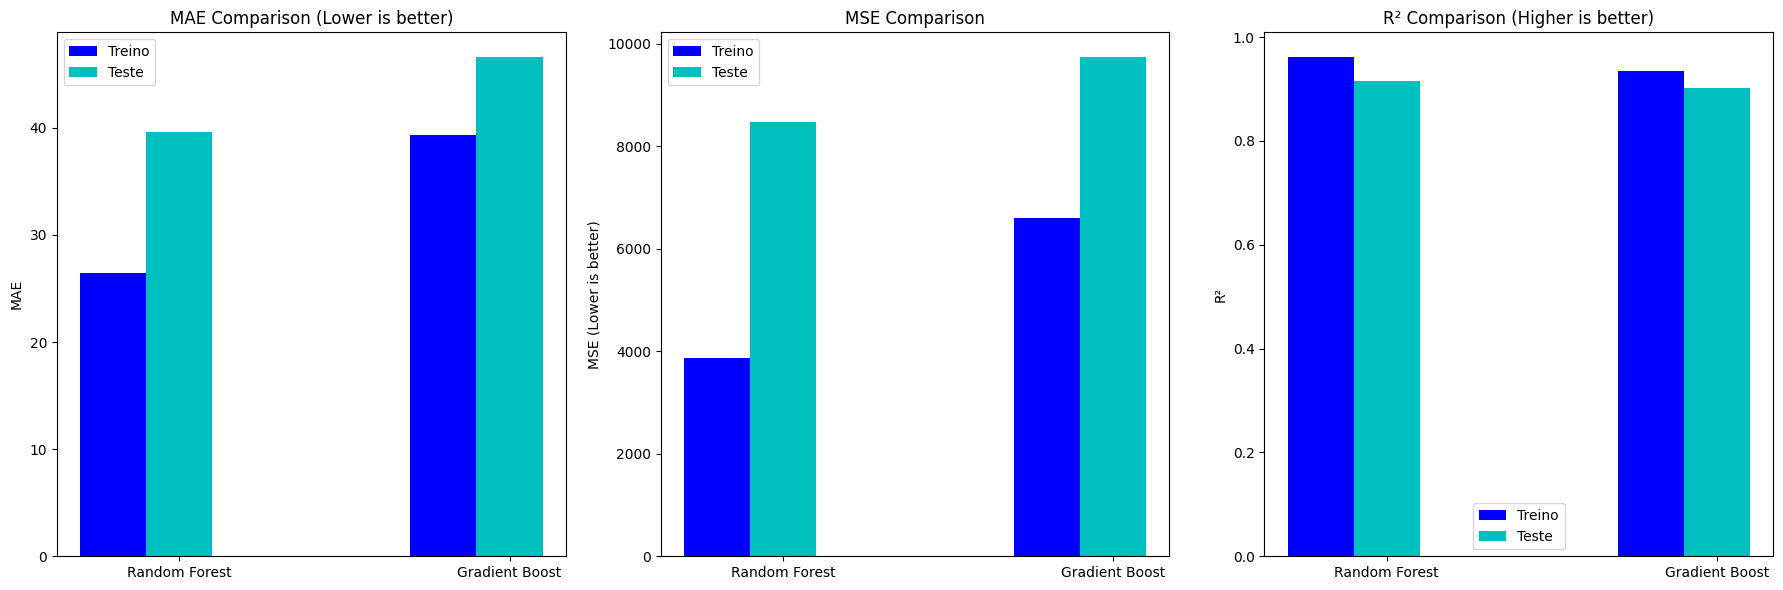

In [360]:
model_comparison(rf_model, gb_model)

## Conclusion

Overall, Random Forest model seems to have better results for this case. Although it's R² shows a bigger difference between train and test results, MAE, MSE and R² values are better than Gradient Boost results.